# Análise do COVID-19 no Brasil (Infectados)
Esse estudo usa parte do codigo dessa análise: https://github.com/lucaslattari/COVID-19

E os parâmetros utilizados nessa análise: https://docs.google.com/document/d/1ZDxOrn9ZljIzrfAnUiDjjLR28ORrvn6tHi2q3ig6WKc

## 1. Base de Dados Original

In [1]:
import urllib.request

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df = pd.read_csv(url, error_bad_lines=False)
#df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,1,1,1,1,1,1,1,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,56,68,79,97,128,158,266,301,387,387
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,52,78,84,115,136,160,194,235,249,265
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,2,2,3,4,6,9,19,32,39,39
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,171,210,267,307,353,436,669,669,818,1029


## 2. Total de casos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81058,81102,81156,81250,81305,81435,81498,81591,81661,81661
Italy,0,0,0,0,0,0,0,0,0,2,...,31506,35713,41035,47021,53578,59138,63927,69176,74386,74386
US,1,1,2,2,5,5,5,5,5,7,...,6421,7783,13677,19100,25489,33276,43847,53740,65778,65778
Spain,0,0,0,0,0,0,0,0,0,0,...,11748,13910,17963,20410,25374,28768,35136,39885,49515,49515
Germany,0,0,0,0,0,1,4,4,4,5,...,9257,12327,15320,19848,22213,24873,29056,32986,37323,37323
Iran,0,0,0,0,0,0,0,0,0,0,...,16169,17361,18407,19644,20610,21638,23049,24811,27017,27017
France,0,0,2,3,3,3,4,5,5,5,...,7715,9124,10970,12758,14463,16243,20123,22622,25600,25600
Switzerland,0,0,0,0,0,0,0,0,0,0,...,2700,3028,4075,5294,6575,7474,8795,9877,10897,10897
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,1960,2642,2716,4014,5067,5745,6726,8164,9640,9640


### 2.1 Total de casos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,321,372,621,793,1021,1546,1924,2247,2554,2554


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1]

#Adicionando novos dias
#dates = dates + ["3/22/20","3/23/20","3/24/20"]
#novasDatas = pd.Series([1546,1960,2247], index=["3/22/20","3/23/20","3/24/20"])
#infected = infected.append(novasDatas)

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail(10)

,date,infected
3/16/20,2020-03-16,200
3/17/20,2020-03-17,321
3/18/20,2020-03-18,372
3/19/20,2020-03-19,621
3/20/20,2020-03-20,793
3/21/20,2020-03-21,1021
3/22/20,2020-03-22,1546
3/23/20,2020-03-23,1924
3/24/20,2020-03-24,2247
3/25/20,2020-03-25,2554


Text(0,0.5,'Number of cases')

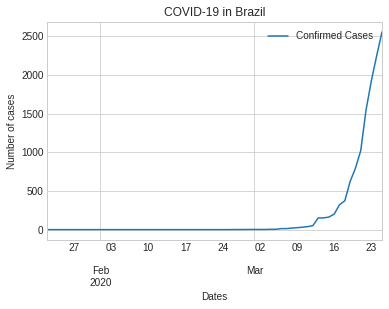

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

### 2.2 Total de casos diários somente na Itália

In [7]:
confirmedCasesByDayItalyDf = sortedConfirmedCasesGroupedDf.loc[['Italy']]
confirmedCasesByDayItalyDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,2,...,31506,35713,41035,47021,53578,59138,63927,69176,74386,74386


In [8]:
datesItaly = list(confirmedCasesByDayItalyDf)[:-1]
infectedItaly = confirmedCasesByDayItalyDf.iloc[0,:-1]

dfForPlotItaly = pd.DataFrame(
    {'date': datesItaly, 'infected': infectedItaly})
dfForPlotItaly['date'] = pd.to_datetime(dfForPlotItaly['date'])
dfForPlotItaly.tail()

,date,infected
3/21/20,2020-03-21,53578
3/22/20,2020-03-22,59138
3/23/20,2020-03-23,63927
3/24/20,2020-03-24,69176
3/25/20,2020-03-25,74386


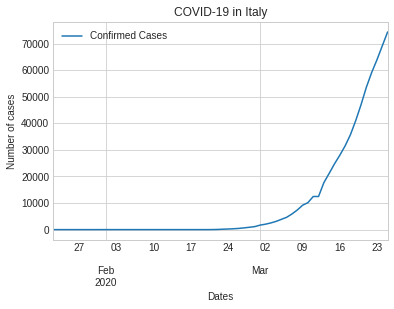

In [9]:
fig = plt.figure()
ax = plt.axes()
dfForPlotItaly.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Italy")
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.legend()

## 3. Previsão por meio da Regressão

### 3.0 Dados comuns a todos os algoritmos abaixo

In [10]:
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', alpha=1 ,label='Confirmed Cases')
    df.set_index('dates')['infected'].plot(legend=True, grid=True, alpha=0.5,label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [11]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['date']))
yTrain = dfForPlotDaysWithInfected['infected']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)

### 3.1 Regressão Linear

In [12]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([   0,   66,  132,  198,  264,  330,  396,  462,  527,  593,  659,
        725,  791,  857,  923,  989, 1055, 1121, 1187, 1253, 1319, 1385,
       1451, 1517, 1583, 1649, 1714, 1780, 1846, 1912, 1978, 2044, 2110,
       2176, 2242, 2308, 2374, 2440, 2506, 2572, 2638, 2704, 2770, 2836,
       2902, 2968, 3034, 3100, 3166, 3232, 3298, 3364, 3430, 3496, 3562,
       3628, 3694, 3760, 3826, 3892, 3958, 4024, 4090, 4156, 4222, 4288,
       4354, 4420, 4486, 4552, 4618, 4684, 4749, 4815, 4881, 4947, 5013,
       5079, 5145, 5211, 5277, 5343, 5409, 5475, 5541, 5607, 5673, 5739,
       5805])

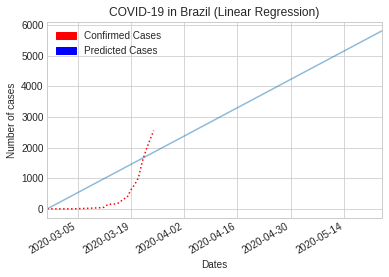

In [13]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

### 3.2 Polynomial Regression 2D

In [14]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

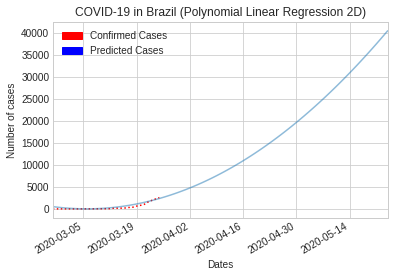

In [15]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 2D")

### 3.3 Polynomial Regression 4D

In [16]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

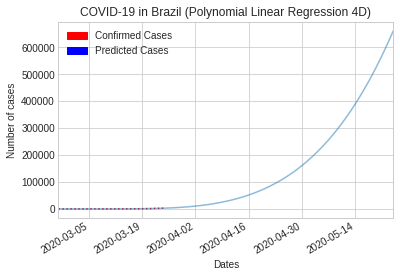

In [17]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 4D")

In [18]:
#print("Proximas previsões: ")

#for idx, val in enumerate(X):
    #if idx >= len(XRealCases):
        #print(pd.to_datetime(val).strftime("%b %d"), " -> ", y[idx])

## 4. Modelo SIR

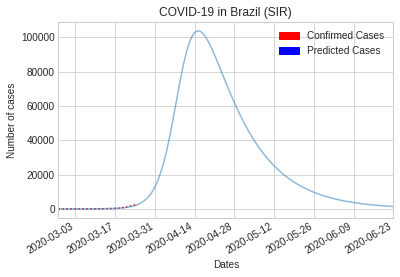

In [19]:
#TODO: Subtrair mortes e curados do real antes de plotar

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import datetime

diasASimular = 90

dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]
#dfForPlotDaysWithInfected = dfForPlotDaysWithInfected[10:]

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)


# Total population, N.
N = 220000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = dfForPlotDaysWithInfected['infected'][0], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./14

# A grid of time points (in days)
t = np.linspace(0, len(X), len(X))

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

plotGraph(X, I, XRealCases, yRealCases, "SIR")

In [20]:
print("Proximas previsões: ")

for idx, val in enumerate(X):
    if idx >= len(XRealCases):
        print(pd.to_datetime(val).strftime("%b %d"), " -> ", int(I[idx]))

Proximas previsões: 
Mar 26  ->  3369
Mar 27  ->  4427
Mar 28  ->  5803
Mar 29  ->  7583
Mar 30  ->  9868
Mar 31  ->  12772
Apr 01  ->  16422
Apr 02  ->  20936
Apr 03  ->  26414
Apr 04  ->  32907
Apr 05  ->  40383
Apr 06  ->  48705
Apr 07  ->  57607
Apr 08  ->  66710
Apr 09  ->  75557
Apr 10  ->  83682
Apr 11  ->  90678
Apr 12  ->  96258
Apr 13  ->  100276
Apr 14  ->  102726
Apr 15  ->  103711
Apr 16  ->  103406
Apr 17  ->  102019
Apr 18  ->  99766
Apr 19  ->  96848
Apr 20  ->  93444
Apr 21  ->  89706
Apr 22  ->  85757
Apr 23  ->  81698
Apr 24  ->  77607
Apr 25  ->  73542
Apr 26  ->  69548
Apr 27  ->  65659
Apr 28  ->  61898
Apr 29  ->  58280
Apr 30  ->  54816
May 01  ->  51511
May 02  ->  48367
May 03  ->  45385
May 04  ->  42561
May 05  ->  39892
May 06  ->  37374
May 07  ->  35001
May 08  ->  32767
May 09  ->  30666
May 10  ->  28692
May 11  ->  26838
May 12  ->  25099
May 13  ->  23468
May 14  ->  21938
May 15  ->  20505
May 16  ->  19163
May 17  ->  17906
May 18  ->  16730
May 19 